### Importing modules

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
Customer=pd.read_csv('Customer.csv')
Product_hierarchy=pd.read_csv('prod_cat_info.csv')
Transaction=pd.read_csv('Transactions.csv')

### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [3]:
# 1. Merging
Customer_Trans = pd.merge(left = Customer,
                          right = Transaction,
                          left_on = 'customer_Id',
                          right_on = 'cust_id',
                          how = 'inner',
                          indicator = True)

In [4]:
Customer_Final = pd.merge(left = Customer_Trans,
                          right = Product_hierarchy,
                          left_on = 'prod_cat_code',
                          right_on = 'prod_cat_code',
                          how = 'inner'
                          )

In [5]:
Customer_Final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic


### 2. Prepare a summary report for the merged data set.

####  a. Get the column names and their corresponding data types

In [6]:
Customer_Final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', '_merge', 'prod_cat',
       'prod_sub_cat_code', 'prod_subcat'],
      dtype='object')

In [7]:
Customer_Final.dtypes

customer_Id             int64
DOB                    object
Gender                 object
city_code             float64
transaction_id          int64
cust_id                 int64
tran_date              object
prod_subcat_code        int64
prod_cat_code           int64
Qty                     int64
Rate                    int64
Tax                   float64
total_amt             float64
Store_type             object
_merge               category
prod_cat               object
prod_sub_cat_code       int64
prod_subcat            object
dtype: object

####   b. Top/Bottom 10 observations

In [8]:
Customer_Final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [9]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


####  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [10]:
continuous_var=Customer_Final._get_numeric_data()

In [11]:
cont_num=Customer_Final.iloc[:,[5,6,7,8]]

In [12]:
cont_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cust_id,99293.0,271030.010635,2429.333624,266783.0,268956.0,270982.0,273120.0,275265.0
prod_subcat_code,99293.0,6.796894,3.609439,1.0,4.0,7.0,10.0,12.0
prod_cat_code,99293.0,4.003243,1.563991,1.0,3.0,5.0,5.0,6.0


#### d. Frequency tables for all the categorical variables
##### Store type

In [13]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['Store_type'])
freq_table.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
freq_table.index = ['Male','Female']
freq_table

,TeleShop,MBR,e-shop,Flagshipstore
Male,9767,9687,9159,19589
Female,10047,10278,10142,20584


##### Prod_cat

In [14]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_cat'])
freq_table.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
freq_table.index = ['Male','Female']
freq_table

,Books,Bags,Clothing,Footwear,Electronics,Home and kitchen
Male,1988,17694,4317,11640,4587,7976
Female,2008,18696,4554,12850,4407,8536


##### Prod_subcat

In [15]:
freq_table = pd.crosstab(index = Customer_Final['Gender'],
                         columns = Customer_Final['prod_subcat'])
freq_table.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
freq_table.index = ['Male','Female']
freq_table

,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
Female,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables. 

In [16]:
import matplotlib
from matplotlib import pyplot as plt

#### Histogram for continous variables -
##### 1. Tax

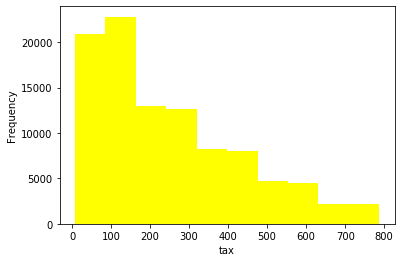

In [17]:
Tax = Customer_Final['Tax']
plt.hist(Tax,color=['yellow'])
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

##### 2. Total amount

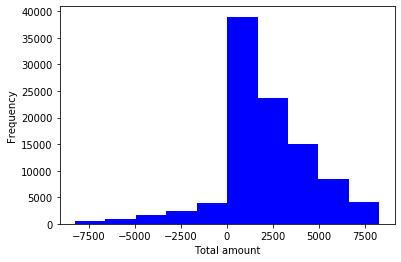

In [18]:
Total_Amt = Customer_Final['total_amt']
plt.hist(Total_Amt,color = 'Blue')
plt.xlabel('Total amount')
plt.ylabel('Frequency')
plt.show()

#### Frequency Bar for Categorical variables -
##### 1. Gender

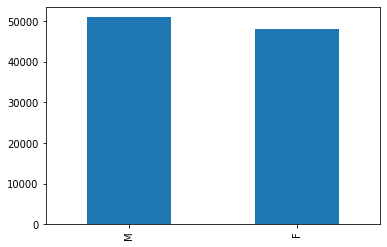

In [19]:
Customer_Final['Gender'].value_counts().plot(kind='bar')

##### 2. Store type

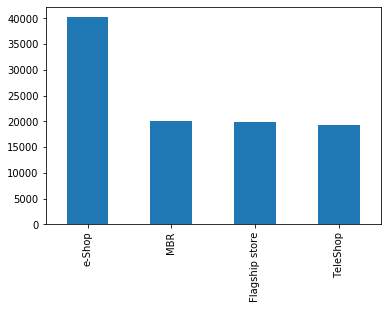

In [20]:
Customer_Final['Store_type'].value_counts().plot(kind ='bar')

##### 3. Product category

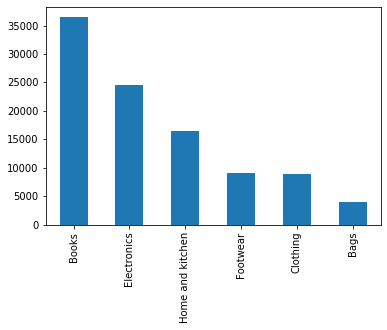

In [21]:
Customer_Final['prod_cat'].value_counts().plot(kind= 'bar')

##### 4. Product sub category

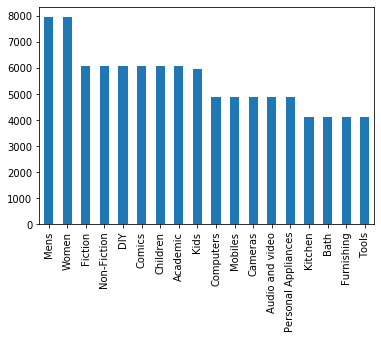

In [22]:
Customer_Final['prod_subcat'].value_counts().plot(kind='bar')

### 4. Calculate the following information using the merged dataset :
#### a. Time period of the available transaction data

In [24]:
Customer_Final.tran_date=pd.to_datetime(Customer_Final.tran_date)

In [26]:
T_max=Customer_Final.tran_date.max()
T_max

Timestamp('2014-12-02 00:00:00')

In [27]:
T_min=Customer_Final.tran_date.min()
T_min

Timestamp('2011-01-02 00:00:00')

In [28]:
from datetime import date
Time_period=T_max-T_min
print(Time_period.days/365)

3.9178082191780823


####  b. Count of transactions where the total amount of transaction was negative 

In [30]:
Customer_Final[Customer_Final['total_amt']<0]['transaction_id'].value_counts()

4170892941     15
42748068902    12
79705520455    12
11355539040    12
62919354697    12
               ..
80615805759     2
50517418841     2
1330248674      2
94756211732     2
72402739188     2
Name: transaction_id, Length: 2059, dtype: int64

In [31]:
Customer_Final.transaction_id[Customer_Final.total_amt<0].count()

9294

### 5. Analyze which product categories are more popular among females vs male customers.

In [33]:
Pop_prod_cat = Customer_Final.groupby(by = ["Gender","prod_cat"])[["prod_cat"]].count()
display(Pop_prod_cat)

prod_cat
Gender prod_cat                  
F      Bags                  1988
       Books                17694
       Clothing              4317
       Electronics          11640
       Footwear              4587
       Home and kitchen      7976
M      Bags                  2008
       Books                18696
       Clothing              4554
       Electronics          12850
       Footwear              4407
       Home and kitchen      8536

In [70]:
cust1=Customer_Final[["Gender","prod_cat"]]

#### For Male

In [82]:
# method 1
resM=cust1.loc[(cust1.Gender =='M') ,]
resMM=resM.groupby("prod_cat")["Gender"].count().reset_index()
max(resMM.Gender)

18696

In [83]:
resMM.loc[resMM.Gender==18696,]

,prod_cat,Gender
1,Books,18696


In [76]:
# Method 2 
# Popular among Male
M = Customer_Final.loc[Customer_Final['Gender']=='M']
group_prod = M.groupby(['prod_cat'])['total_amt'].sum()
popular_M = group_prod.nlargest(1)
display('The most popular product category in Male customers is : ',popular_M)

'The most popular product category in Male customers is : '

prod_cat
Books    39875836.65
Name: total_amt, dtype: float64

#### For Female

In [84]:
# method 1
resF=cust1.loc[cust1.Gender =='F',]
resFF=resF.groupby("prod_cat")["Gender"].count().reset_index()
max(resFF.Gender)

17694

In [85]:
resFF.loc[resFF.Gender==17694,]

,prod_cat,Gender
1,Books,17694


In [89]:
# method 2
# Popular among Female
F = Customer_Final.loc[Customer_Final['Gender']=='F']
group_prod1 = F.groupby(['prod_cat'])['total_amt'].sum()
popular_F = group_prod1.nlargest(1)
display('The most popular product category in Female customers is : ',popular_F)

'The most popular product category in Female customers is : '

prod_cat
Books    36988153.41
Name: total_amt, dtype: float64

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [88]:
max_cust = Customer['city_code'].value_counts()
t = max_cust.nlargest(1)

display("City code which has Maximum customers is : ",t)

'City code which has Maximum customers is : '

3.0    595
Name: city_code, dtype: int64

In [98]:
#percentage of customers from city code 3
tot_customer = Customer['customer_Id'].count()
percent = round((595/tot_customer)*100,2)
print("Percentage of customers from the city code 3 is {}% : ".format(percent))

Percentage of customers from the city code 3 is 10.54% : 


### 7. Which store type sells the maximum products by value and by quantity? 

In [34]:
Max_prod = Customer_Final.groupby(by = ["Store_type"])["Qty","total_amt"].sum().sort_values(["Qty","total_amt"],ascending=[False,False]).groupby(level=0).head(1)
Max_prod.head(1)

,Qty,total_amt
Store_type,,
e-Shop,98447,8.591575e+07


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [100]:
df = pd.DataFrame(Customer_Final)
tf = df[df.prod_cat.isin(['Electronics','Clothing']) & (df.Store_type == 'Flagship store')]
total = tf.total_amt.sum()
print('Total amount earned',total)

Total amount earned 14658949.89


In [36]:
G1=Customer_Final.loc[(Customer_Final.prod_cat=="Electronics")|(Customer_Final.prod_cat=="Clothing")]
G1=G1.loc[(G1.Store_type=="Flagship store")]
G1.groupby(by=["Store_type","prod_cat"])[["total_amt"]].sum()

total_amt
Store_type     prod_cat                
Flagship store Clothing      3583269.69
               Electronics  11075680.20

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [101]:
tf1 = df[(df.Gender == 'M') & (df.prod_cat == 'Electronics')]
total = tf1.total_amt.sum()
print('Total amount earned',total)

Total amount earned 28515547.125


In [39]:
Tf2=Customer_Final.loc[(Customer_Final.Gender=="M")&(Customer_Final.prod_cat=="Electronics")]
Tf2.groupby(by=["Gender","prod_cat"])[["total_amt"]].sum()

,,total_amt
Gender,prod_cat,
M,Electronics,2.851555e+07


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [102]:
df1 = df[(df.total_amt > 0)]
ts = df1.transaction_id.nunique()
print('Total customers having more than 10 unique transactions are - ',ts)

Total customers having more than 10 unique transactions are -  20876


### 11. For all customers aged between 25 - 35, find out:
####   a. What was the total amount spent for “Electronics” and “Books” product categories? 

In [105]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(df['DOB']).year          #extract year from DOB
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
df['age'] = (np.where(dob_year > curr_year,v,y))
df.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat,age
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction,50
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic,50


In [106]:
total = df.loc[((df.age >25) & (df.age <35)) & ((df.prod_cat=='Books') | (df.prod_cat=='Electronics'))]['total_amt'].sum()
print('Total amount earned',total)

Total amount earned 38905651.06999999


####  b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [107]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

t_date = Customer_Final[(Customer_Final['tran_date'] > '2014-01-01') & (Customer_Final['tran_date'] < '2014-03-01')]
total_amount = t_date.total_amt.sum()
print('Total amount spent by the customer - ',total_amount)

Total amount spent by the customer -  5591225.965
